## Importing libraries to use

In [179]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Importing data

In [ ]:
# prompt: i have csv file in github i want to import here

url= "https://raw.githubusercontent.com/mayureshmahavarkar18/Student-analysis-AIML-club/main/meteors_EDA/meteors_data.csv"
df = pd.read_csv(url)
df.head()

## Basic data analysis: looking at data

In [ ]:
df.describe()

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["mass", "reclat", "reclong", "year"]
scatter_matrix(df[attributes], figsize=(12, 8))

plt.show()

In [ ]:
X = df["reclong"]
Y = df["reclat"]

plt.scatter(X, Y, color='green')

plt.show()

In [ ]:
df["mass"] = df["mass"].fillna(df["mass"].mean())

In [ ]:
df["maping_mass"] = np.abs(np.pow(df["mass"], 0.4))

In [ ]:
import plotly.express as px

fig = px.scatter_geo(df,
                     lat='reclat',
                     lon='reclong',
                     hover_name="name", # show the meteorite name on hover
                     hover_data=["mass"], # show the mass on hover
                     size="maping_mass"
                     )
fig.show()

## Data Cleaning

### Deleting unnecessary coloumns

In [ ]:
df.columns

In [ ]:
col_del = ['nametype', 'fall', 'geolocation', ':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4']

for col in col_del:
  try:
    df = df.drop(col, axis=1)
  except:
    print(".")

In [ ]:
df

In [ ]:
date = df.year.str.split('-', expand=True)

In [ ]:
df['year_only'] = date[0]
df = df.drop("year", axis=1)
display(df.head())

In [ ]:
# prompt: i want class wise frequency plot

fig = px.histogram(df, x='year_only', color='recclass', title='Frequency of Meteorites by Year and Class')
fig.update_layout(xaxis={'categoryorder': 'category ascending'})
fig.show()

In [ ]:
# prompt: give me sep data that has class and count

sep = df.groupby('recclass')['id'].count().reset_index()
sep.columns = ['Class', 'Count']
display(sep)

In [ ]:
# @title Count

from matplotlib import pyplot as plt
sep['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
rec_class = pd.Series(df["recclass"].unique())
rec_class = rec_class.sort_values()

In [ ]:
rec_class.isna().unique()

For seeing full dataset

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [ ]:
# Display all rows and columns of pandas DataFrames and Series for better inspection
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Now, when you display a series, it will show all rows and columns (if it were a DataFrame)
# For example, you can display the rec_class series again
# display(rec_class) # Example of displaying a Series, commented out as rec_class is not defined here

### Classifying the meteorites further using hierarchy level

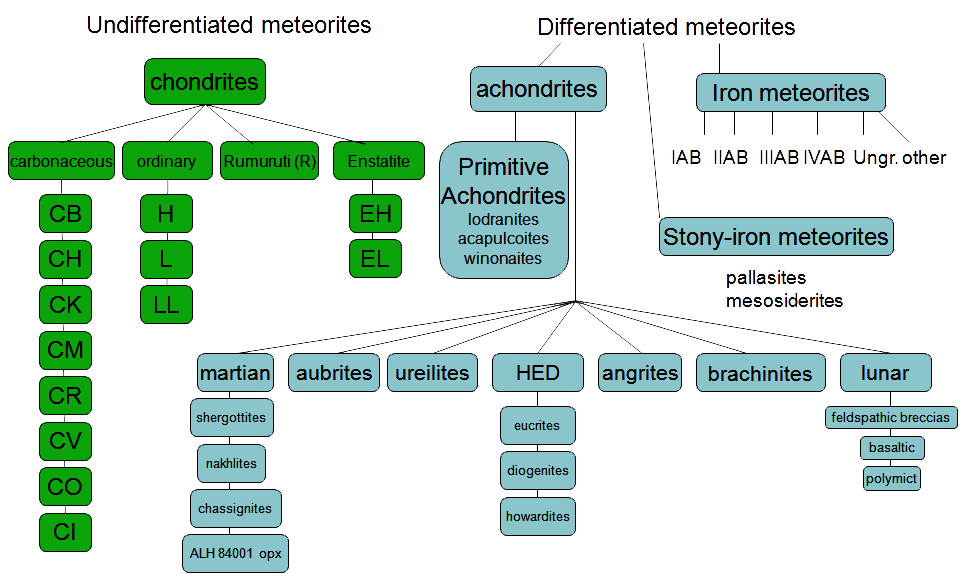

In [ ]:
import re

# This function classifies the meteorite recclass using regex rules
def classify_meteorite_recclass_regex(recclass_string):
    recclass_lower = str(recclass_string).lower()

    # Define a list of regex patterns and their corresponding classifications (class1, class2)
    # class0 will be determined later based on class1
    classification_rules = [
        (r'^(eh|el).*$', ('Chondrites', 'Enstatite')),
        (r'^c.*$', ('Chondrites', 'carbonaceous')), # Rule for class_2 'carbonaceous' based on starting with 'C'
        (r'eucrite|howardite|diogenite', ('Achondrites', 'achondrites')),
        (r'^(h|l|ll|l/ll|h/l).*?$', ('Chondrites', 'ordinary')), # Modified regex to include h/l and use .*?
        (r'iron', ('Iron', 'Iron')),
        (r'^(r|k)[\d\W]*$', ('Chondrites', 'Chondrites')),
        (r'pallasite|mesosiderite', ('Stony-iron', 'Stony-iron')),
        (r'^acapulcoite$', ('Acondrites', 'Primitive')),
        (r'^stone-uncl$', ('stony', 'Stone-uncl')),
        (r'^achondrite-ung$', ('Achondrites', 'achondrites')),
        (r'^angrite$', ('Achondrites', 'achondrites')),
        (r'^aubrite$', ('Achondrites', 'achondrites')),
        (r'^oc$', ('Chondrites', 'chondrites')),
        (r'^ureilite$', ('Achondrites', 'achondrites')),
        (r'^lodranite|winonaite$', ('Acondrites', 'Primitive')),
        (r'martian', ('Achondrites', 'achondrites')),
        (r'^ureilite-an$', ('Achondrites', 'achondrites')),
        (r'^rumuruti$', ('Chondrites', 'Rumuruti')),
        # Add more specific rules here
    ]

    class1 = None
    class2 = None

    # Iterate through the rules and apply the first matching one
    for pattern, (c1, c2) in classification_rules:
        if re.search(pattern, recclass_lower):
            class1 = c1
            class2 = c2
            break # Stop after the first match

    # Apply the user's requested class_0 hierarchy based on class_1
    class0 = None
    if class1 == 'Chondrites':
        class0 = 'Undifferentiated'
    elif class1 is not None: # For all other classified class_1 values
        class0 = 'Differentiated'


    # If no classification is found by any rule, return (None, None, None)
    if class0 is None and class1 is None and class2 is None:
        return (None, None, None)
    else:
        return (class0, class1, class2)


# Apply the classification function to create new columns
df['class_0'] = df['recclass'].apply(lambda x: classify_meteorite_recclass_regex(x)[0])
df['class_1'] = df['recclass'].apply(lambda x: classify_meteorite_recclass_regex(x)[1])
df['class_2'] = df['recclass'].apply(lambda x: classify_meteorite_recclass_regex(x)[2])


# Display the DataFrame with the new classification columns
display(df[['recclass', 'class_0', 'class_1', 'class_2']].head())

# You can now further analyze based on these new classes. For example,
# count occurrences within each class_0:
print("\nCounts by Class 0:")
display(df['class_0'].value_counts())

# Or create visualizations based on the new hierarchy
fig = px.histogram(df, x='class_0', color='class_1', title='Meteorites Classified by Hierarchy (Regex)')
fig.show()

# Display the recclass for the unclassified meteorites again
unclassified_meteorites_after = df[df['class_0'].isna() | df['class_1'].isna() | df['class_2'].isna()]
print("\nRecclass values for unclassified meteorites after modification:")
display(unclassified_meteorites_after['recclass'].value_counts())

In [ ]:
non_ctg = df['class_2'].isna()
df[non_ctg].sort_values('recclass')

In [ ]:
# Count occurrences in each class level
print("Counts by Class 0:")
display(df['class_0'].value_counts().dropna())

print("\nCounts by Class 1:")
display(df['class_1'].value_counts().dropna())

print("\nCounts by Class 2:")
display(df['class_2'].value_counts().dropna())

## Map category wise

In [ ]:
import plotly.express as px
import pandas as pd

# Ensure mass column has no missing values for size mapping
df['mass'] = df['mass'].fillna(df['mass'].mean())

# Explicitly fill None values in classification columns with 'Unclassified' right before plotting
df['class_0'] = df['class_0'].fillna('Unclassified')
df['class_1'] = df['class_1'].fillna('Unclassified')
df['class_2'] = df['class_2'].fillna('Unclassified')

def classified_map(ctg_class):
  fig = px.scatter_geo(df,
                     lat='reclat',
                     lon='reclong',
                     color=f'class_{ctg_class}', # Color points by class_0 (change to 'class_1' or 'class_2' manually)
                     hover_name="name", # show the meteorite name on hover
                     hover_data=["mass", "recclass", "class_0", "class_1", "class_2"], # show relevant data on hover
                     size="maping_mass", # Size points by mass
                     projection="natural earth", # Use a suitable projection
                     title=f'Meteorite Landings World Map - Colored by Class {ctg_class}' # Title
                    )
  fig.show()



Meteorite Landings World Map - Colored by Class-0

In [ ]:
classified_map(0)

Meteorite Landings World Map - Colored by Class-1

In [ ]:
classified_map(1)

Meteorite Landings World Map - Colored by Class-2

In [ ]:
classified_map(2)